# Synthea Patient Data Analysis

This notebook demonstrates how to use `fhiry` to process HL7 FHIR bundles (JSON) generated by [Synthea](https://synthea.mitre.org/). We will analyzing patient demographics and visualize the prevalence of various **Clinical Conditions**.

## 1. Setup and Installation

Ensure `fhiry`, `seaborn` and `python-dotenv` are installed.

In [ ]:
%pip install fhiry seaborn matplotlib tqdm python-dotenv

In [6]:
%matplotlib inline
import os
import fhiry.parallel as fp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from dotenv import load_dotenv

# Set better visualization defaults
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
load_dotenv()

False

## 2. Load and Process Data

We will load FHIR bundles. If the `SYNTHEA` environment variable is not set, we will fallback to a local test resources folder for demonstration purposes.

In [7]:
data_path = os.getenv("SYNTHEA")

# Fallback to test resources if SYNTHEA env var is not set
if not data_path or not os.path.exists(data_path):
    print("SYNTHEA environment variable not set or invalid. Using local test resources.")
    # Assuming the notebook is running from the notebooks/ folder, and tests/ is at ../tests/
    data_path = os.path.abspath(os.path.join(os.getcwd(), "../tests/resources"))

# Process FHIR bundles into a pandas DataFrame
df = fp.process(data_path)

# Show basic info
print(df.info())
# Inspect columns to see available data
print("Columns:", df.columns.tolist())
df.head()

SYNTHEA environment variable not set or invalid. Using local test resources.


Processing JSON files: 100%|██████████| 3/3 [00:00<00:00, 14.55it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Columns: 111 entries, fullUrl to patientId
dtypes: float64(5), object(106)
memory usage: 1.0+ MB
None
Columns: ['fullUrl', 'resourceType', 'id', 'text.status', 'text.div', 'extension', 'identifier', 'name', 'telecom', 'gender', 'birthDate', 'address', 'maritalStatus.text', 'multipleBirthBoolean', 'communication', 'request.method', 'request.url', 'active', 'type', 'status', 'class.system', 'class.code', 'subject.reference', 'participant', 'period.start', 'period.end', 'serviceProvider.reference', 'code.text', 'encounter.reference', 'onsetDateTime', 'recordedDate', 'udiCarrier', 'distinctIdentifier', 'manufactureDate', 'expirationDate', 'lotNumber', 'serialNumber', 'deviceName', 'type.text', 'patient.reference', 'use', 'billablePeriod.start', 'billablePeriod.end', 'created', 'provider.reference', 'diagnosis', 'insurance', 'item', 'total.value', 'total.currency', 'contained', 'referral.reference', 'claim.reference',

,fullUrl,resourceType,id,text.status,text.div,extension,identifier,name,telecom,gender,...,patient.display.display,provider.display.display,priority.coding.codes,insurer.display.display,achievementStatus.coding.codes,valueCodeableConcept.coding.codes,vaccineCode.coding.codes,medicationCodeableConcept.coding.codes,requester.display.display,patientId
0,urn:uuid:5cbc121b-cd71-4428-b8b7-31e53eba8184,Patient,5cbc121b-cd71-4428-b8b7-31e53eba8184,generated,"<div xmlns=""http://www.w3.org/1999/xhtml"">Gene...",[{'url': 'http://hl7.org/fhir/us/core/Structur...,[{'system': 'https://github.com/synthetichealt...,"[{'use': 'official', 'family': 'Brekke496', 'g...","[{'system': 'phone', 'value': '555-677-3119', ...",male,...,,,,,,,,,,5cbc121b-cd71-4428-b8b7-31e53eba8184
1,urn:uuid:8ad64ecf-c817-3753-bee7-006a8e662e06,Organization,8ad64ecf-c817-3753-bee7-006a8e662e06,NaN,NaN,NaN,[{'system': 'https://github.com/synthetichealt...,MORTON HOSPITAL,"[{'system': 'phone', 'value': '5088287000'}]",NaN,...,,,,,,,,,,
2,urn:uuid:0000016d-3a85-4cca-0000-000000000122,Practitioner,0000016d-3a85-4cca-0000-000000000122,NaN,NaN,NaN,"[{'system': 'http://hl7.org/fhir/sid/us-npi', ...","[{'family': 'Breitenberg711', 'given': ['Benne...","[{'system': 'email', 'value': 'Bennett146.Brei...",male,...,,,,,,,,,,
3,urn:uuid:f78d73fc-9f9b-46d5-93aa-f5db86ba914c,Encounter,f78d73fc-9f9b-46d5-93aa-f5db86ba914c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,,,,5cbc121b-cd71-4428-b8b7-31e53eba8184
4,urn:uuid:4e3be31c-bb2c-479c-b855-23e3103e42d5,Condition,4e3be31c-bb2c-479c-b855-23e3103e42d5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,,,,,,,,,5cbc121b-cd71-4428-b8b7-31e53eba8184


## 3. Patient Demographics

We can visualize the gender distribution of the patients in our dataset.

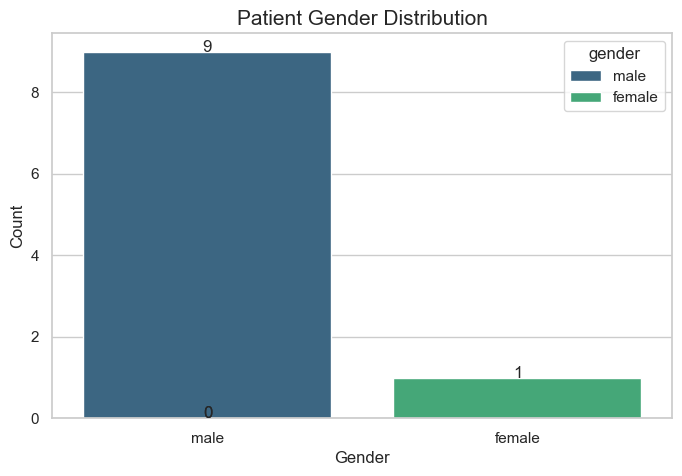

In [8]:
# fhiry removes 'resource.' prefix from column names
gender_col = 'gender'
if gender_col in df.columns:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, x=gender_col, hue=gender_col, palette='viridis')
    plt.title('Patient Gender Distribution', fontsize=15)
    plt.xlabel('Gender')
    plt.ylabel('Count')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline')
    plt.show()
else:
    print(f"{gender_col} column not found in dataset.")

## 4. Clinical Condition Analysis

We will visualize the most frequent clinical conditions found in the dataset.

Note: Since `fhiry` flattens the resources, we need to inspect the relevant columns for condition codes or display names.

Using column 'code.text' for condition names.


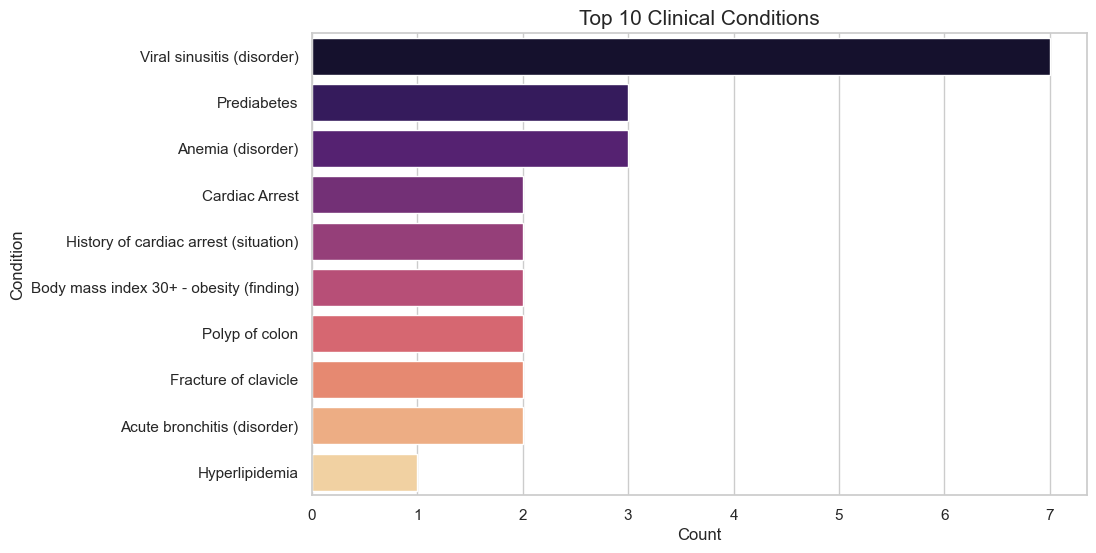

Top conditions details:
code.text
Viral sinusitis (disorder)                 7
Prediabetes                                3
Anemia (disorder)                          3
Cardiac Arrest                             2
History of cardiac arrest (situation)      2
Body mass index 30+ - obesity (finding)    2
Polyp of colon                             2
Fracture of clavicle                       2
Acute bronchitis (disorder)                2
Hyperlipidemia                             1
Name: count, dtype: int64


In [10]:
# Filter for Conditions
# fhiry strips 'resource.' so 'resource.resourceType' becomes 'resourceType'
resource_type_col = 'resourceType'
if resource_type_col in df.columns:
    condition_df = df[df[resource_type_col] == 'Condition'].copy()

    # Try to find a display name column first for better readability, otherwise code
    # Common flattening patterns: 'code.text', 'code.coding.0.display', 'code.coding.0.code'
    display_col = None
    for col in condition_df.columns:
        if 'code' in col and 'text' in col:
             display_col = col
             break
        if 'code' in col and 'display' in col:
             display_col = col
             break

    if not display_col:
        # Fallback to code
        for col in condition_df.columns:
             if 'code.coding' in col and 'code' in col:
                 display_col = col
                 break

    if display_col:
        print(f"Using column '{display_col}' for condition names.")

        # Get top 10 conditions
        top_conditions = condition_df[display_col].value_counts().head(10)

        if not top_conditions.empty:
            plt.figure(figsize=(10, 6))
            # Assign condition name to hue and set legend=False to avoid deprecation warning
            sns.barplot(x=top_conditions.values, y=top_conditions.index, hue=top_conditions.index, palette='magma', legend=False)
            plt.title('Top 10 Clinical Conditions', fontsize=15)
            plt.xlabel('Count')
            plt.ylabel('Condition')
            plt.show()

            # Show some details
            print("Top conditions details:")
            print(top_conditions)
        else:
            print("No condition data found.")

    else:
        print("Could not populate Condition names/codes from the flattened dataframe.")
else:
    print(f"'{resource_type_col}' column not found in dataframe.")